<a href="https://colab.research.google.com/github/tiennvuit/CS431.L21-Deep-learning-and-Applications/blob/main/exercise01/01_implement_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center> Implement CNN example for Classification task

In [25]:
# import nessesary libs
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
import numpy as np
from matplotlib import pyplot as plt
print(tf.__version__)

2.4.1


## Get the MNIST dataset

In [18]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### Preprocessing data

In [19]:
train_images = np.expand_dims(train_images, 3) / 255.0
test_images = np.expand_dims(test_images, 3) / 255.0

## Define model with specific config and optimizer

### Define model

In [34]:
input_dim = (28, 28, 1)

model = tf.keras.Sequential()
model.add( tf.keras.layers.Input(shape=input_dim))
model.add(tf.keras.layers.Conv2D(filters= 48 , kernel_size= [3,3] , padding = 'same' , activation =  'relu'))
model.add(tf.keras.layers.Conv2D(filters= 48 , kernel_size= [3,3] , padding = 'same' , activation =  'relu'))
model.add(tf.keras.layers.Conv2D(filters= 48 , kernel_size= [3,3] , padding = 'same' , activation =  'relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2) , strides= (2,2) , padding = 'same'))

model.add(tf.keras.layers.Conv2D(filters= 32 , kernel_size= [3,3] , padding = 'same' , activation =  'relu'))
model.add(tf.keras.layers.Conv2D(filters= 32 , kernel_size= [3,3] , padding = 'same' , activation =  'relu'))
model.add(tf.keras.layers.Conv2D(filters= 32 , kernel_size= [3,3] , padding = 'same' , activation =  'relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2) , strides= (2,2) , padding = 'same'))

model.add(tf.keras.layers.Conv2D(filters= 16 , kernel_size= [3,3] , padding = 'same' , activation =  'relu'))
model.add(tf.keras.layers.Conv2D(filters= 16 , kernel_size= [3,3] , padding = 'same' , activation =  'relu'))
model.add(tf.keras.layers.Conv2D(filters= 16 , kernel_size= [3,3] , padding = 'same' , activation =  'relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2) , strides= (2,2) , padding = 'same'))


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units = 128 , activation= 'relu'))
model.add(tf.keras.layers.Dense(units = 10 , activation= 'relu'))

In [35]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 48)        480       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 28, 28, 48)        20784     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 28, 28, 48)        20784     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 48)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 14, 14, 32)        13856     
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 14, 14, 32)       

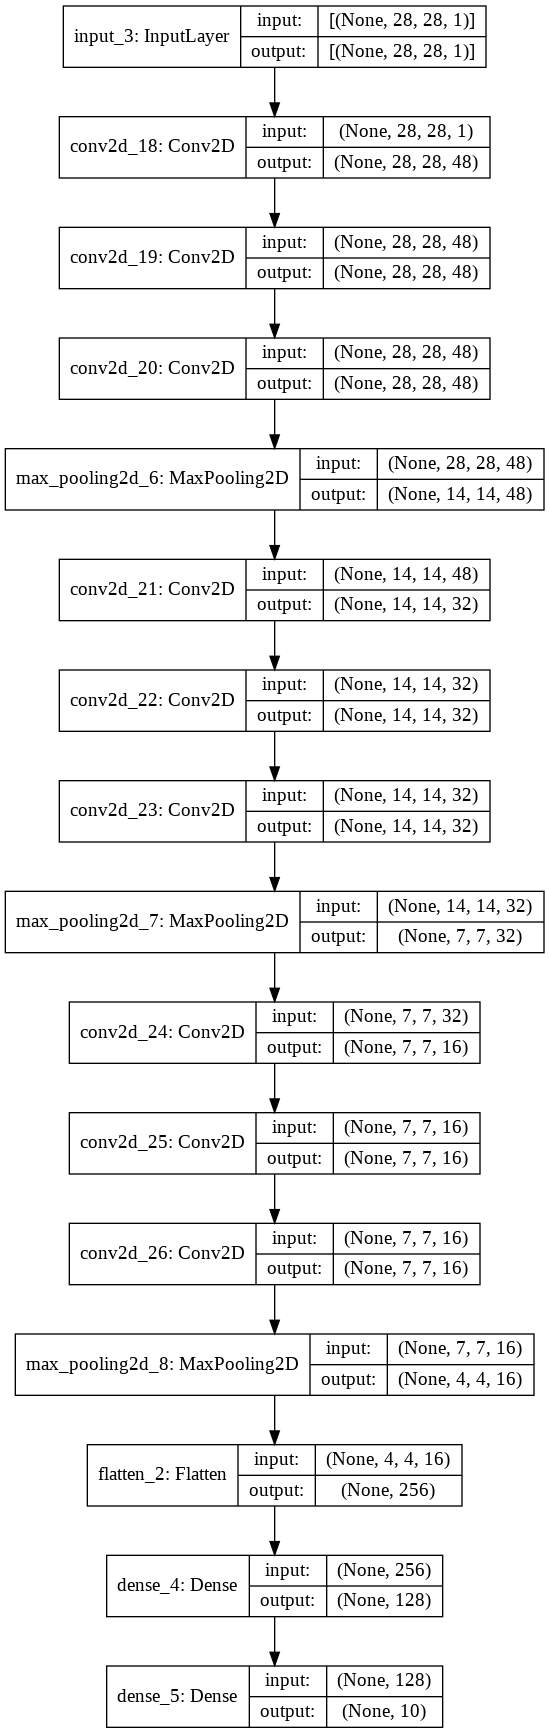

In [70]:
model_img = 'model.png'
tf.keras.utils.plot_model(model, to_file=model_img, show_shapes=True)

### Compile optimizer

In [40]:
model.compile(optimizer='RMSprop',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

## Training model

In [41]:
log = model.fit(train_images, train_labels, 
          batch_size = 128,
          validation_data = (test_images, test_labels),
          validation_steps = 1,
          epochs=10)

Epoch 1/10
469/469 [==============================] - 8s 16ms/step - loss: 1.1854 - accuracy: 0.5844 - val_loss: 0.4277 - val_accuracy: 0.8281
Epoch 2/10
469/469 [==============================] - 7s 16ms/step - loss: 0.4956 - accuracy: 0.7972 - val_loss: 0.4136 - val_accuracy: 0.8281
Epoch 3/10
469/469 [==============================] - 7s 16ms/step - loss: 0.4807 - accuracy: 0.7992 - val_loss: 0.4082 - val_accuracy: 0.8203
Epoch 4/10
469/469 [==============================] - 7s 16ms/step - loss: 0.4571 - accuracy: 0.8071 - val_loss: 0.4017 - val_accuracy: 0.8281
Epoch 5/10
469/469 [==============================] - 7s 16ms/step - loss: 0.4610 - accuracy: 0.8051 - val_loss: 0.4003 - val_accuracy: 0.8281
Epoch 6/10
469/469 [==============================] - 7s 15ms/step - loss: 0.4663 - accuracy: 0.8023 - val_loss: 0.4077 - val_accuracy: 0.8203
Epoch 7/10
469/469 [==============================] - 7s 15ms/step - loss: 0.4516 - accuracy: 0.8074 - val_loss: 0.4025 - val_accuracy: 0.8281

Plot the training progress by Matplotlib

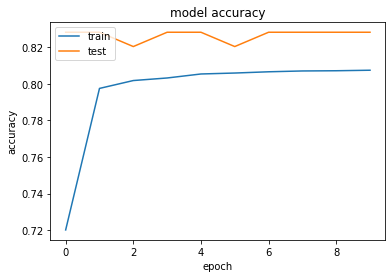

In [45]:
plt.plot(log.history['accuracy'])
plt.plot(log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.yscale('linear')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

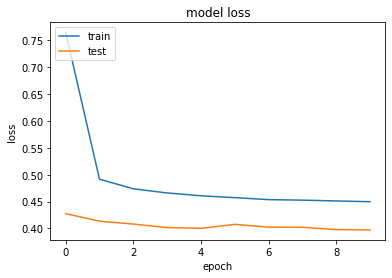

In [44]:
plt.plot(log.history['loss'])
plt.plot(log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.yscale('linear')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Prediction

In [72]:
# Select the random image from test set
# np.random.seed(18521489)
index = np.random.choice(len(test_images), 1)
x = test_images[index]

# Make prediction by trained model
confs = model.predict(x).tolist()
print("probs: {}".format(confs))

# Get the class have highest confident
class_pred = np.argmax(confs)
print("class_pred: {}".format(class_pred))
print("class_true: {}".format(test_labels[index][0]))

probs: [[0.0, 12.672101974487305, 0.0, 0.0, 0.41811683773994446, 0.0, 0.0, 0.0, 0.0, 0.0]]
class_pred: 1
class_true: 1


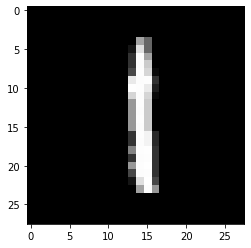

In [74]:
# Visualize result
fig = plt.figure
plt.imshow(test_images[index][0,:,:,0], cmap='gray')
plt.show()